### !!only run this if you need to install any of those packages!!

In [1]:
!pip install tifffile
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install colorcet
!pip install labeling --upgrade

Requirement already up-to-date: labeling in c:\mpicbg\anaconda3\lib\site-packages (0.1.4)


## Import all necessary dependencies

In [2]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
from tifffile import imread
from scipy.ndimage import rotate
import json
import colorcet as cc
import matplotlib.pyplot as plt
import matplotlib.colors as col
from labeling import Labeling as lb

## Tutorial preparation: Create example
We prepare eight example images that we merge together into a single labeling file.

In [21]:
example_images = []
example_images.append(np.invert(imread("up_big.tif")))
example_images[0][example_images[0]>0] = 130
example_images.append(rotate(np.transpose(np.flip(example_images[0]).copy()), angle=45, reshape=False, mode="grid-constant", cval=0, order=0))
example_images[1][example_images[1]>0] = 131
example_images.append(np.transpose(np.flip(example_images[0]).copy()))
example_images[2][example_images[2]>0] = 132
example_images.append(rotate(np.flip(example_images[0]).copy(), angle=45, reshape=False, mode="grid-constant", cval=0, order=0))
example_images[3][example_images[3]>0] = 133
example_images.append(np.flip(example_images[0]).copy())
example_images[4][example_images[4]>0] = 134
example_images.append(rotate(np.transpose(example_images[0]).copy(), angle=45, reshape=False, mode="grid-constant", cval=0, order=0))
example_images[5][example_images[5]>0] = 135
example_images.append(np.transpose(example_images[0]).copy())
example_images[6][example_images[6]>0] = 136
example_images.append(rotate(example_images[0], angle=45, reshape=False, mode="grid-constant", cval=0, order=0))
example_images[7][example_images[7]>0] = 137

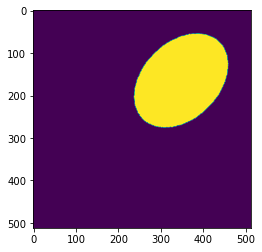

In [29]:
plt.imshow(example_images[1])

## Example 1: Iterate over all images

In [22]:

labeling = lb.Labeling.fromValues(np.zeros((512,512),np.int32))
labeling.iterate_over_images(example_images, [str(int) for int in list(range(1,len(example_images)+1))])
img, labelingdata = labeling.save_result("example")

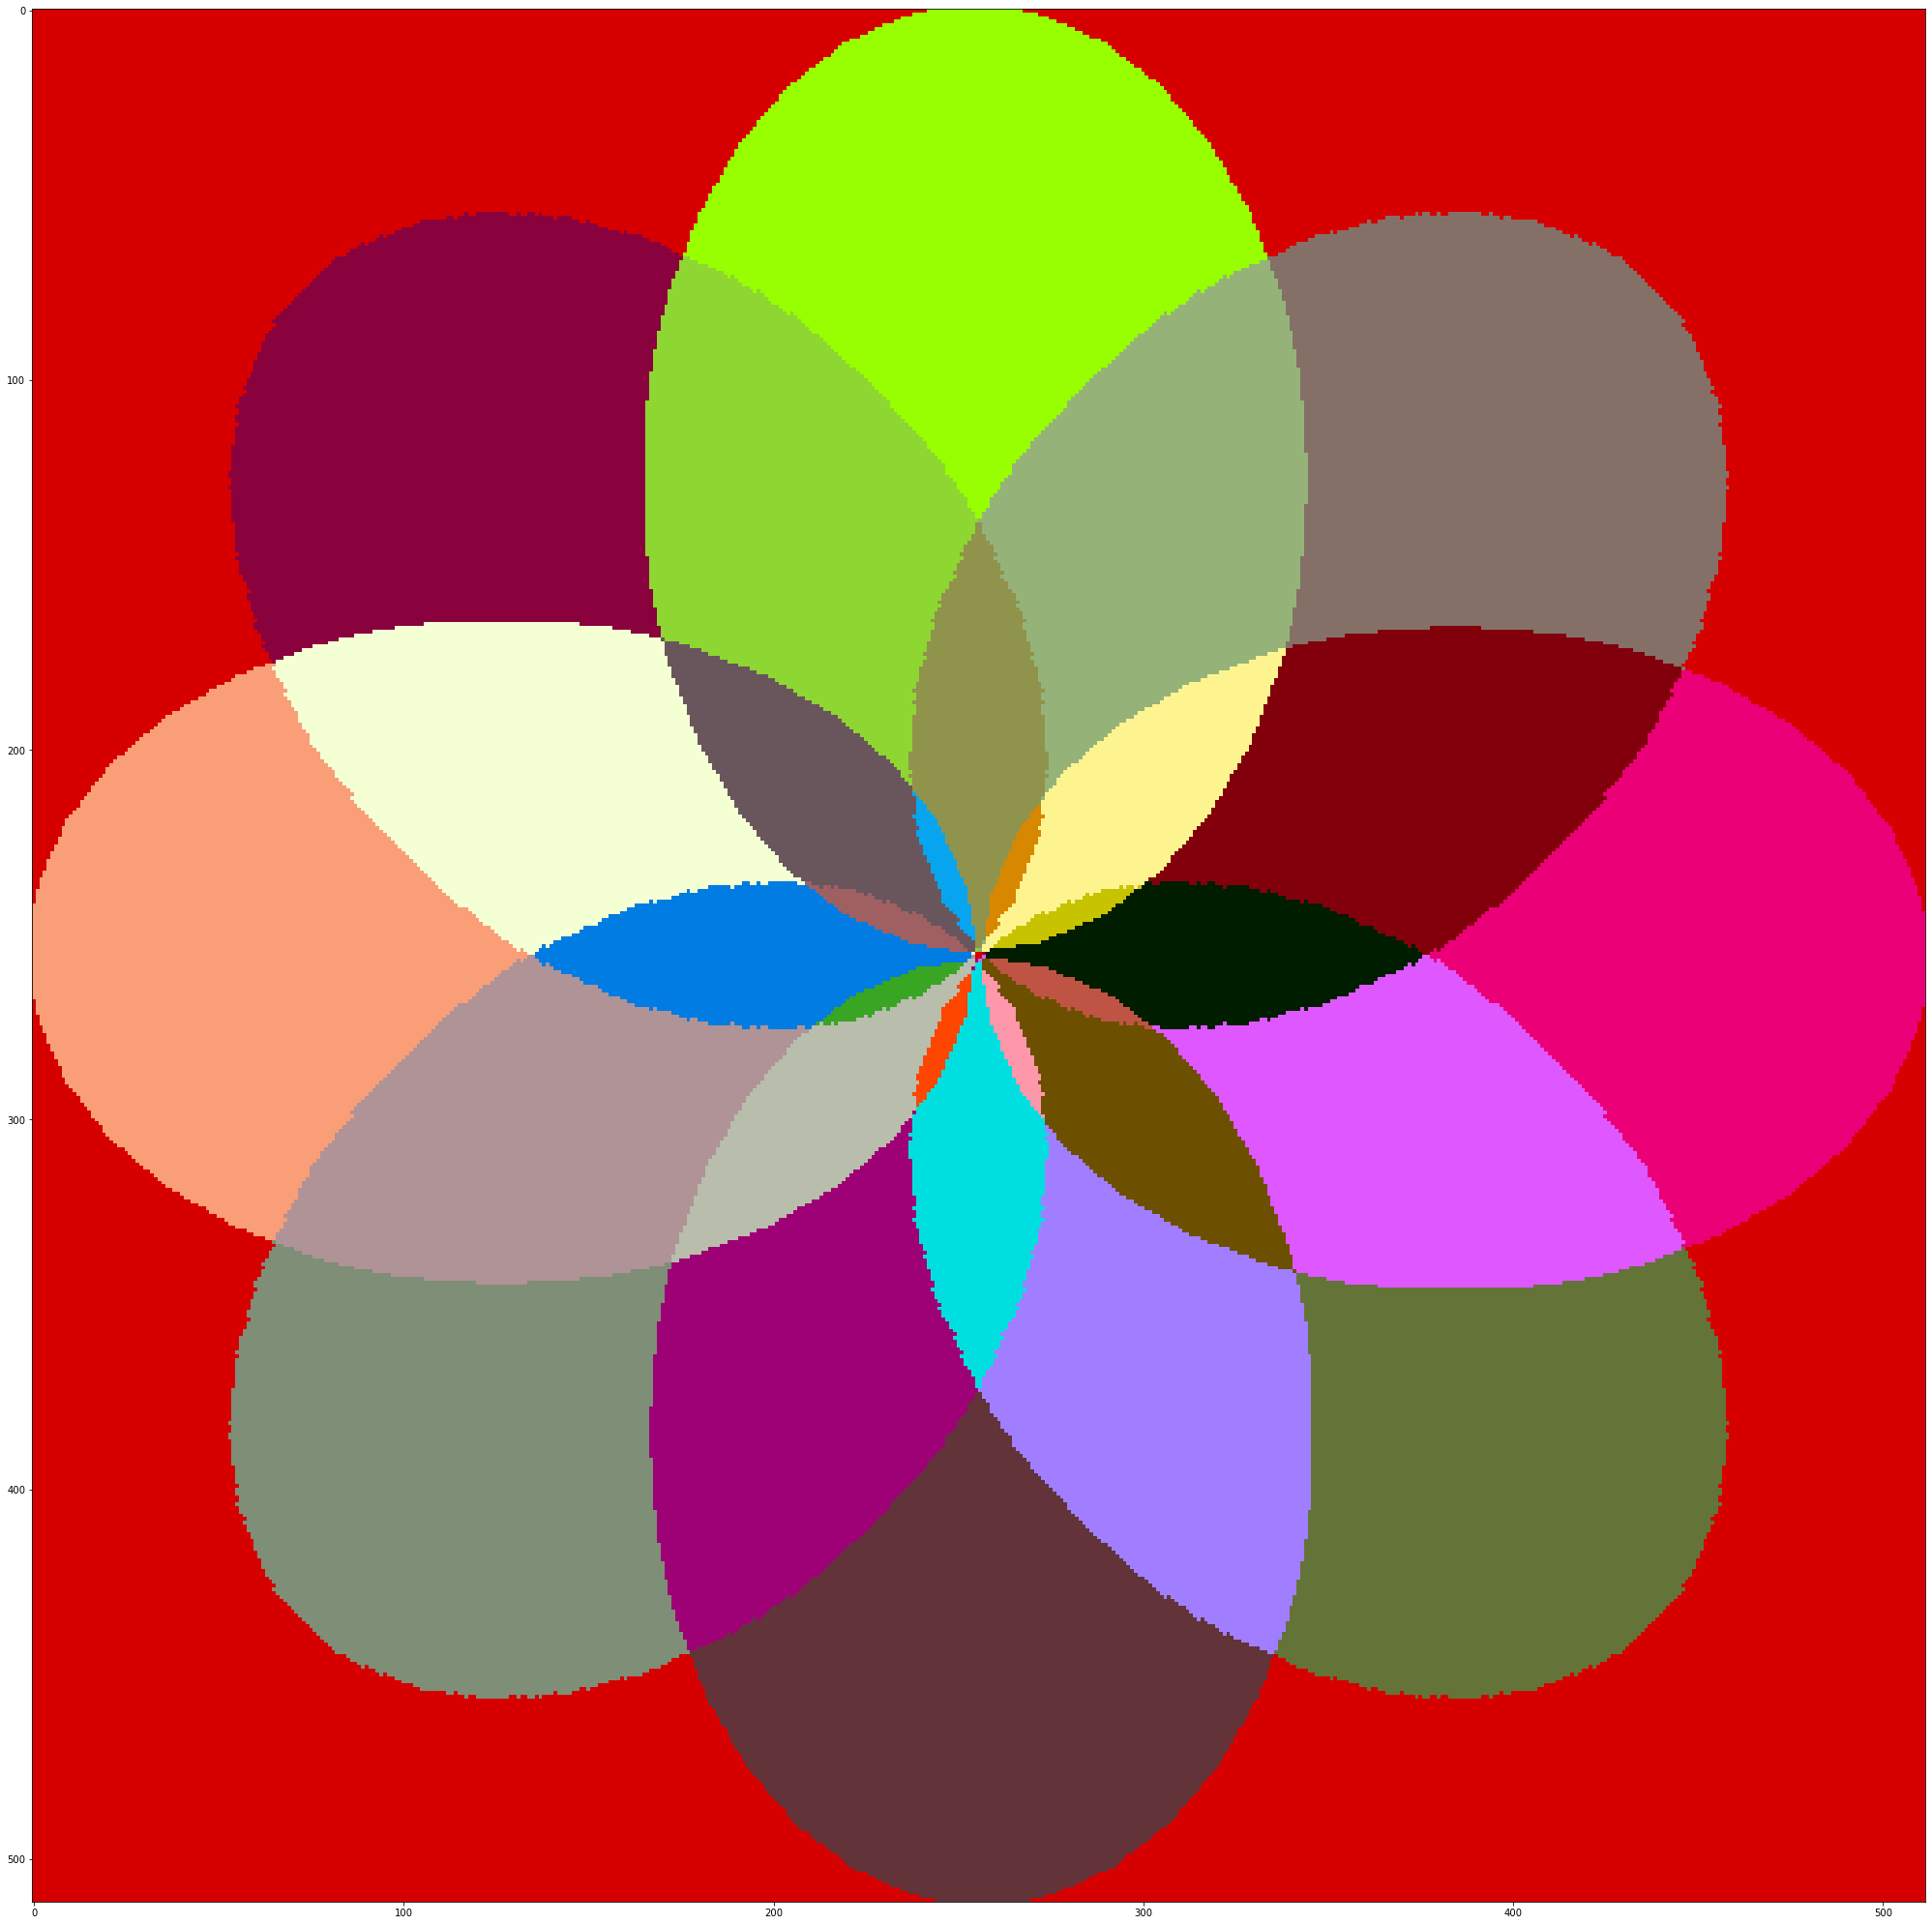

In [27]:
plt.figure(figsize=(36, 36))
plt.imshow(img, norm=col.Normalize(vmin=0, vmax=53, clip=True), cmap=cc.cm.glasbey_bw)

In [ ]:
display(vars(labelingdata))

## Example 2: Save Labeling with Metadata
We are going to use the labeling data created in the Example before and save it with MetaData attached to it.

In [ ]:
meta = {
    "date": "2021-06-28",
    "revision": 1,
    "author": "Tom Burke"
}
labeling.add_metadata(meta)
img, labelingdata = labeling.save_result("example2")
display(vars(labelingdata))

## Example 3: Loading data from file
The image is expected to be in the same folder as the .bson-File by default.
The examples above provide just that. We lode the labeling created in Example1.

In [ ]:
loaded_labeling = lb.Labeling.from_file('example2.bson')
plt.imshow(loaded_labeling.img)
display(vars(loaded_labeling.labels))